In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import random

import os
print(os.listdir("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/out"))

# Any results you write to the current directory are saved as output.

['rain_princess.0111.jpg', 'rain_princess.0105.jpg', 'rain_princess.238.jpg', 'rain_princess.210.jpg', 'wave.0037.jpg', 'wave.0023.jpg', 'rain_princess.358.jpg', 'rain_princess.364.jpg', 'rain_princess.402.jpg', 'rain_princess.416.jpg', 'rain_princess.370.jpg', 'wave.0043 2.jpg', 'wave.0006 2.jpg', 'rain_princess.0065.jpg', 'rain_princess.0071.jpg', 'rain_princess.0059.jpg', 'rain_princess.0058.jpg', 'rain_princess.0070.jpg', 'rain_princess.0064.jpg', 'rain_princess.417.jpg', 'rain_princess.371.jpg', 'rain_princess.365.jpg', 'rain_princess.403.jpg', 'rain_princess.359.jpg', 'wave.0022.jpg', 'wave.0022 2.jpg', 'wave.0036.jpg', 'rain_princess.211.jpg', 'rain_princess.239.jpg', 'rain_princess.0104.jpg', 'rain_princess.0110.jpg', 'rain_princess.0106.jpg', 'wave.0058 2.jpg', 'rain_princess.0112.jpg', 'rain_princess.213.jpg', 'wave.0020.jpg', 'wave.0034.jpg', 'rain_princess.398.jpg', 'wave.0008.jpg', 'rain_princess.373.jpg', 'rain_princess.415.jpg', 'rain_princess.401.jpg', 'rain_princess.36

In [136]:
filenames = os.listdir("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/out")
if('.DS_Store' in filenames):
    filenames.remove('.DS_Store')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
#     if category == 'udnie':
#         categories.append(1)
#     el
    if category == 'rain_princess':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df


,filename,category
0,rain_princess.0111.jpg,1
1,rain_princess.0105.jpg,1
2,rain_princess.238.jpg,1
3,rain_princess.210.jpg,1
4,wave.0037.jpg,0
5,wave.0023.jpg,0
6,rain_princess.358.jpg,1
7,rain_princess.364.jpg,1
8,rain_princess.402.jpg,1
9,rain_princess.416.jpg,1


In [17]:
# df = pd.get_dummies(X,
#         columns=['category'])
# df['category']=df['category_la_muse']*100+ df['category_rain_princess']*10+df['category_wave']
# df

,filename,category_la_muse,category_rain_princess,category_wave,category
0,rain_princess.0111.jpg,0,1,0,10
1,rain_princess.0105.jpg,0,1,0,10
2,rain_princess.238.jpg,0,1,0,10
3,rain_princess.210.jpg,0,1,0,10
4,wave.0037.jpg,0,0,1,1
5,wave.0023.jpg,0,0,1,1
6,rain_princess.358.jpg,0,1,0,10
7,rain_princess.364.jpg,0,1,0,10
8,rain_princess.402.jpg,0,1,0,10
9,rain_princess.416.jpg,0,1,0,10


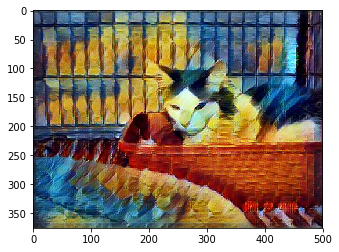

In [137]:
sample = random.choice(filenames)
image = load_img("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/out/"+sample)
plt.imshow(image)

In [138]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_31 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_32 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [139]:
# df = df.sample(n=100).reset_index()
batch_size=15
total_train = df.shape[0]
img_gen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20
)

train_generator = img_gen.flow_from_dataframe(
    df, 
    "/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/out/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    batch_size=batch_size
)

Found 465 images belonging to 2 classes.


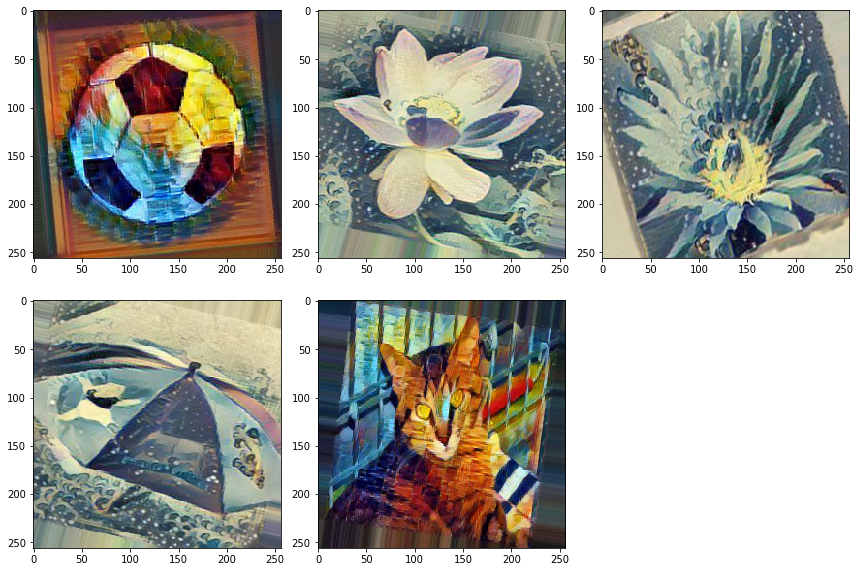

In [140]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_generator:
    for i in range(0, 5):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i])
    plt.tight_layout()
    plt.show()
    break

In [141]:
model.fit_generator(train_generator, epochs=30, steps_per_epoch=total_train/batch_size)

Epoch 1/30
31/31 [==============================] - 39s 1s/step - loss: 0.3687 - acc: 0.8774
Epoch 2/30
31/31 [==============================] - 35s 1s/step - loss: 0.0279 - acc: 0.9957
Epoch 3/30
31/31 [==============================] - 34s 1s/step - loss: 0.0041 - acc: 1.0000
Epoch 4/30
31/31 [==============================] - 33s 1s/step - loss: 0.0087 - acc: 1.0000
Epoch 5/30
31/31 [==============================] - 33s 1s/step - loss: 0.0049 - acc: 1.0000
Epoch 6/30
31/31 [==============================] - 32s 1s/step - loss: 0.0105 - acc: 1.0000
Epoch 7/30
31/31 [==============================] - 32s 1s/step - loss: 0.0099 - acc: 0.9978
Epoch 8/30
31/31 [==============================] - 33s 1s/step - loss: 0.0086 - acc: 0.9978
Epoch 9/30
31/31 [==============================] - 34s 1s/step - loss: 0.0050 - acc: 1.0000
Epoch 10/30
31/31 [==============================] - 34s 1s/step - loss: 0.0120 - acc: 1.0000
Epoch 11/30
31/31 [==============================] - 34s 1s/step - lo

KeyboardInterrupt: 

In [ ]:
model.save_weights("model.h5")

In [ ]:
test_filenames = os.listdir("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/test")
test_filenames.remove('.DS_Store')
test_df = pd.DataFrame({
    'filename': test_filenames
})
# test_df = test_df.sample(n=10).reset_index() 
nb_samples = test_df.shape[0]

In [ ]:
test_df.head()

In [131]:
test_gen = ImageDataGenerator()
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/test/", 
    x_col='filename',
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

Found 164 images.


In [132]:
test_df

,filename
0,rain_princess.0048 2.jpg
1,wave.0037.jpg
2,rain_princess.0030 2.jpg
3,rain_princess.0065.jpg
4,rain_princess.0071.jpg
5,rain_princess.0059.jpg
6,rain_princess.0058.jpg
7,rain_princess.0070.jpg
8,rain_princess.0064.jpg
9,rain_princess.359.jpg


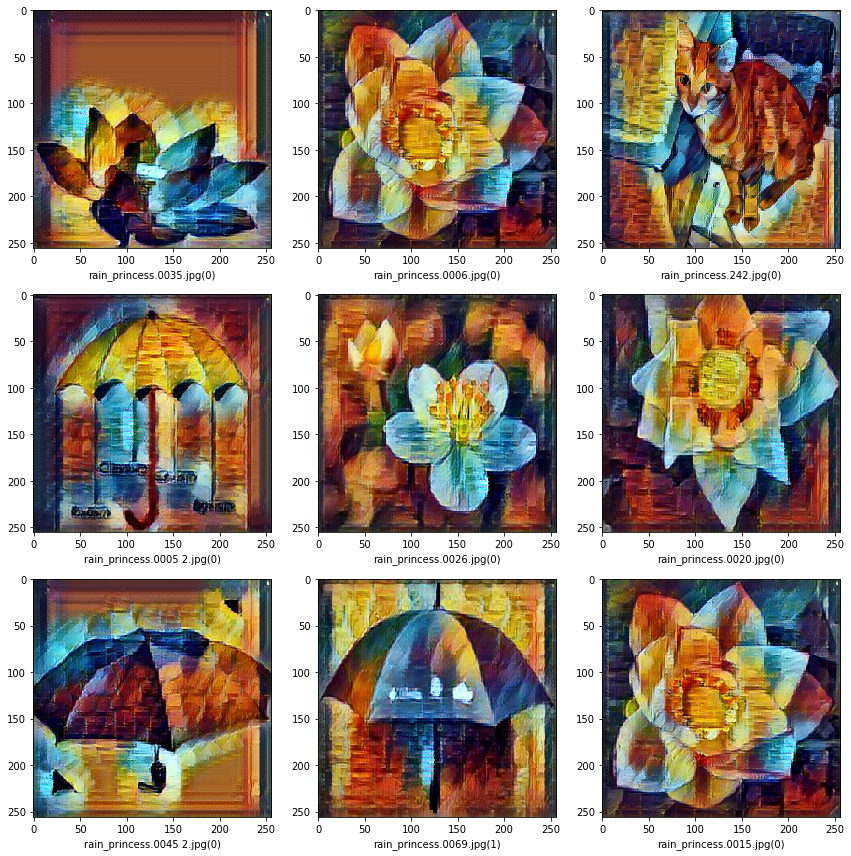

In [133]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size)).astype('int64')
test_df['category'] = predict
sample_test = test_df.sample(n=9,replace=True).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [134]:
test_df

,filename,category
0,rain_princess.0048 2.jpg,0
1,wave.0037.jpg,0
2,rain_princess.0030 2.jpg,0
3,rain_princess.0065.jpg,0
4,rain_princess.0071.jpg,0
5,rain_princess.0059.jpg,0
6,rain_princess.0058.jpg,0
7,rain_princess.0070.jpg,0
8,rain_princess.0064.jpg,0
9,rain_princess.359.jpg,0
